In [1]:
%tensorflow_version 2.x
%pylab inline
from tensorflow import keras

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load the MNIST dataset from Keras
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

# Normalize the training data to be in the range [0, 1]
x_train = x_train / 255.0

# Normalize the test data to be in the range [0, 1]
x_test = x_test / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
# Create the encoder model
encoder = keras.models.Sequential([
    # Flatten the input images (28x28) into a 1D array of 784 elements
    keras.layers.Flatten(input_shape=[28, 28]),
    # Add a dense layer with 100 neurons and ReLU activation function
    keras.layers.Dense(100, activation="relu"),
    # Add another dense layer with 30 neurons and ReLU activation function
    keras.layers.Dense(30, activation="relu"),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
# Create the decoder model
decoder = keras.models.Sequential([
    # Add a dense layer with 100 neurons and ReLU activation function, input shape is 30 (output from encoder)
    keras.layers.Dense(100, activation="relu", input_shape=[30]),
    # Add a dense layer with 784 neurons (28*28) and sigmoid activation function to output pixel values in range [0, 1]
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    # Reshape the output into the original image shape (28x28)
    keras.layers.Reshape([28, 28])
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Stack the encoder and decoder models to create the autoencoder
stacked_autoencoder = keras.models.Sequential([encoder, decoder])

In [6]:
# Compile the stacked autoencoder model
stacked_autoencoder.compile(
    # Use binary cross-entropy loss function for binary input data (normalized pixel values)
    loss="binary_crossentropy",
    # Use the Adam optimizer for efficient training
    optimizer='adam'
)


In [7]:
# Train the stacked autoencoder model
history = stacked_autoencoder.fit(
    # Input and target data are both x_train (input images) for reconstruction
    x_train, x_train,
    # Train for 10 epochs
    epochs=10,
    # Use x_test for validation during training
    validation_data=[x_test, x_test]
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.2043 - val_loss: 0.1093
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1083 - val_loss: 0.1014
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1019 - val_loss: 0.0977
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0983 - val_loss: 0.0953
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0958 - val_loss: 0.0934
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0945 - val_loss: 0.0927
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0931 - val_loss: 0.0916
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0923 - val_loss: 0.0913
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0916 - val_loss: 0.0902
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0910 - val_loss: 0.0899


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


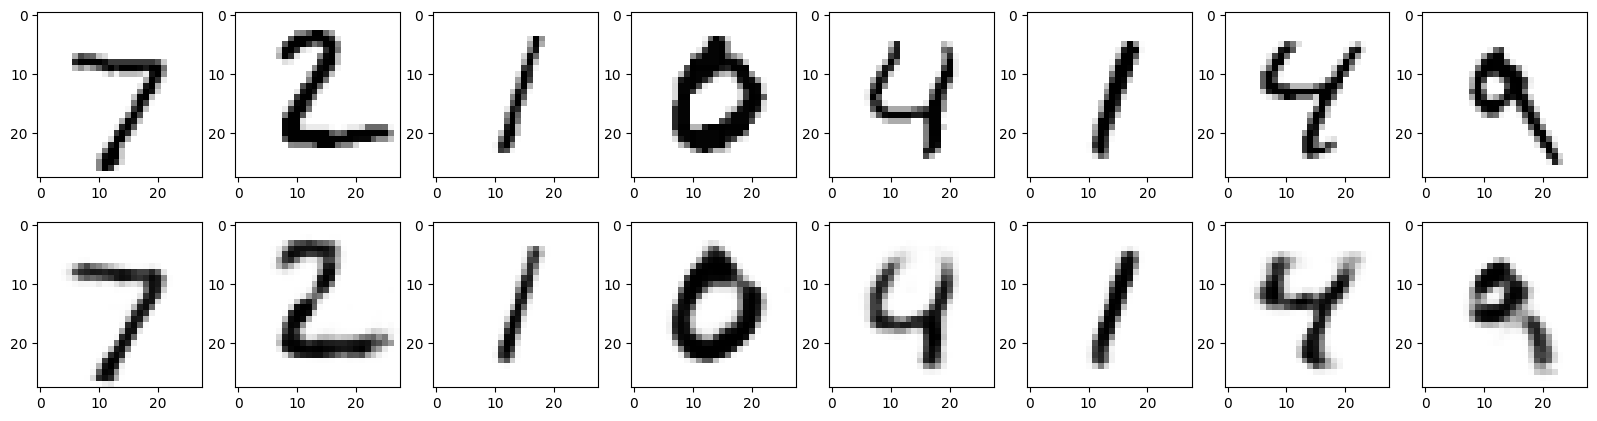

In [8]:
# Set the figure size for the plot
figsize(20, 5)

# Iterate over a range of 8 examples from the test set
for i in range(8):
    # Plot the original image from the test set
    subplot(2, 8, i+1)
    # Make a prediction using the stacked autoencoder on the current test image
    pred = stacked_autoencoder.predict(x_test[i].reshape((1, 28, 28)))
    # Display the original image
    imshow(x_test[i], cmap="binary")

    # Plot the reconstructed image by the stacked autoencoder
    subplot(2, 8, i+8+1)
    # Display the reconstructed image
    imshow(pred.reshape((28, 28)), cmap="binary")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


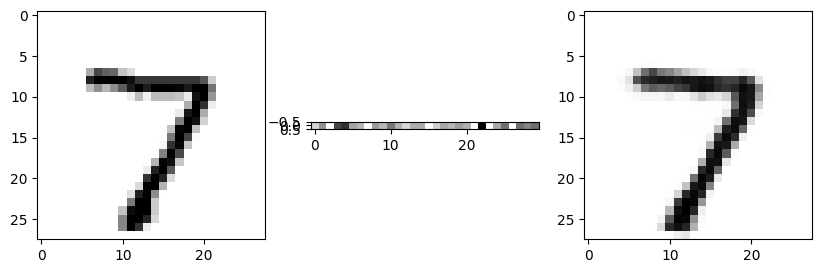

In [9]:
# Set the index i to choose a specific example from the test set
i = 0  # Change this number to select a different example

# Set the figure size for the plot
figsize(10, 5)

# Plot the original image
subplot(1, 3, 1)
imshow(x_test[i], cmap="binary")

# Plot the latent vector representation obtained from the encoder
subplot(1, 3, 2)
# Predict the latent vector representation of the selected test image
latent_vector = encoder.predict(x_test[i].reshape((1, 28, 28)))
imshow(latent_vector, cmap="binary")

# Plot the reconstructed image from the latent vector using the decoder
subplot(1, 3, 3)
# Reconstruct the image from the latent vector representation
pred = decoder.predict(latent_vector)
imshow(pred.reshape((28, 28)), cmap="binary")


In [10]:
# 30 / (28 * 28), 1 - 30 / (28 * 28)

# Calculate the sparsity constraints
sparsity_low = 30 / (28 * 28)  # Lower bound for sparsity constraint
sparsity_high = 1 - 30 / (28 * 28)  # Upper bound for sparsity constraint

# Print the calculated values
print(sparsity_low, sparsity_high)



0.03826530612244898 0.9617346938775511
